In [1]:
from bs4 import BeautifulSoup
import requests
import nltk

In [2]:
#What are the most frequent words in the novel Moby Dick and how often do they occur?

# Getting the Moby Dick HTML 
r = requests.get('https://s3.amazonaws.com/assets.datacamp.com/production/project_147/datasets/2701-h.htm')

# Setting the correct text encoding of the HTML page
r.encoding = 'utf-8'

# Extracting the HTML from the request object
html = r.text

# Printing the first 2000 characters in html
print(html[:2001])

<?xml version="1.0" encoding="utf-8"?>

<!DOCTYPE html
   PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN"
   "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd" >

<html xmlns="http://www.w3.org/1999/xhtml" lang="en">
  <head>
    <title>
      Moby Dick; Or the Whale, by Herman Melville
    </title>
    <style type="text/css" xml:space="preserve">

    body { background:#faebd0; color:black; margin-left:15%; margin-right:15%; text-align:justify }
    P { text-indent: 1em; margin-top: .25em; margin-bottom: .25em; }
    H1,H2,H3,H4,H5,H6 { text-align: center; margin-left: 15%; margin-right: 15%; }
    hr  { width: 50%; text-align: center;}
    .foot { margin-left: 20%; margin-right: 20%; text-align: justify; text-indent: -3em; font-size: 90%; }
    blockquote {font-size: 100%; margin-left: 0%; margin-right: 0%;}
    .mynote    {background-color: #DDE; color: #000; padding: .5em; margin-left: 10%; margin-right: 10%; font-family: sans-serif; font-size: 95%;}
    .toc       { margin-left: 10%; m

In [3]:
# Creating a BeautifulSoup object from the HTML
soup = BeautifulSoup(html)

# Getting the text out of the soup
text = soup.prettify()

# Printing out text between characters 32000 and 34000
print(text[3200:3401])

/Users/bobbylowe/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Users/bobbylowe/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


>
    <a href="#link2HCH0002">
     CHAPTER 2. The Carpet-Bag.
    </a>
   </p>
   <p class="toc">
    <a href="#link2HCH0003">
     CHAPTER 3. The Spouter-Inn.
    </a>
   </p>
   <p class="toc">
    


In [4]:
# Get soup title
soup.title

<title>
      Moby Dick; Or the Whale, by Herman Melville
    </title>

In [5]:
# Get soup title as string
soup.title.string

'\r\n      Moby Dick; Or the Whale, by Herman Melville\r\n    '

In [6]:
# Get hyperlinks from soup and check out first several
soup.findAll('a')[:8]

[<a href="#link2H_4_0002"> ETYMOLOGY. </a>,
 <a href="#link2H_4_0003"> EXTRACTS (Supplied by a Sub-Sub-Librarian).
         </a>,
 <a href="#link2HCH0001"> CHAPTER 1. Loomings. </a>,
 <a href="#link2HCH0002"> CHAPTER 2. The Carpet-Bag. </a>,
 <a href="#link2HCH0003"> CHAPTER 3. The Spouter-Inn. </a>,
 <a href="#link2HCH0004"> CHAPTER 4. The Counterpane. </a>,
 <a href="#link2HCH0005"> CHAPTER 5. Breakfast. </a>,
 <a href="#link2HCH0006"> CHAPTER 6. The Street. </a>]

In [7]:
# Get the text out of the soup and print it# Get t 
text = soup.get_text()
#print(text)

In [8]:
from nltk.tokenize import RegexpTokenizer

# Create tokenizer
tokenizer = RegexpTokenizer('\w+')

# Create tokens
tokens = tokenizer.tokenize(text)
tokens[:8]


['Moby', 'Dick', 'Or', 'the', 'Whale', 'by', 'Herman', 'Melville']

In [9]:
#Same method using the package re
# Import regex package
import re

# Find all words in Moby Dick and print several
tokens = re.findall('\w+', text)
tokens[:8]

['Moby', 'Dick', 'Or', 'the', 'Whale', 'by', 'Herman', 'Melville']

In [10]:
# A new list to hold the lowercased words
words = []

# Looping through the tokens and make them lower case
for word in tokens:
    words.append(word.lower())
    
words[:8]

['moby', 'dick', 'or', 'the', 'whale', 'by', 'herman', 'melville']

In [11]:
# Get English stopwords and print some of them
nltk.download('stopwords')
sw = nltk.corpus.stopwords.words('english')
sw[:5]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/bobbylowe/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i', 'me', 'my', 'myself', 'we']

In [12]:

# Initialize new list# Initia 
words_ns = []

# Add to words_ns all words that are in words but not in sw
for word in words:
    if word not in sw:
        words_ns.append(word)

# Print several list items as sanity check
words_ns[:5]

['moby', 'dick', 'whale', 'herman', 'melville']

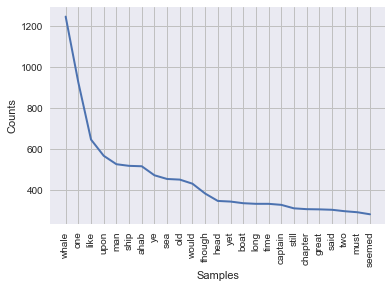

In [13]:
#Import datavis libraries#Import  
import matplotlib.pyplot as plt
import seaborn as sns

# Figures inline and set visualization style
%matplotlib inline
sns.set()

# Create freq dist and plot
freqdist1 = nltk.FreqDist(words_ns)
freqdist1.plot(25)

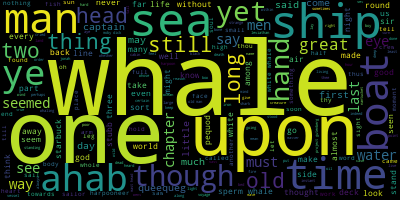

In [14]:
# Import the wordcloud library
import wordcloud

# Join the different processed titles together.
long_string = " ".join(words_ns)

# Create a WordCloud object
wordcloud = wordcloud.WordCloud()

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [15]:
# modules for generating the word cloud# module 
from os import path, getcwd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator

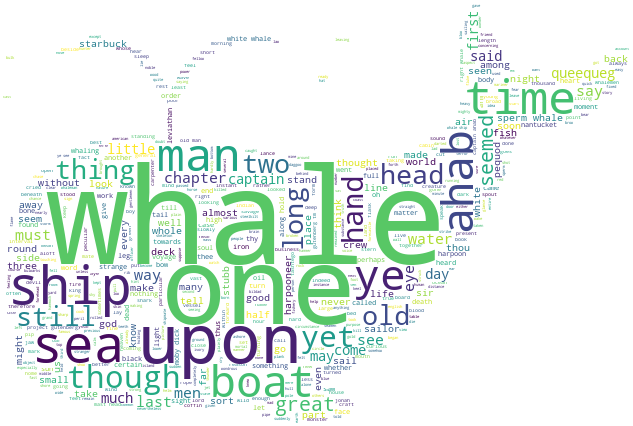

In [16]:
d = getcwd()
## join all documents in corpus
text = " ".join(words_ns)

#image saved
icon = "whale-clipart-1"
icon_path = "%s.jpg" % icon

icon = Image.open(icon_path).convert("RGBA")
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)

# Word Cloud with colored mask
wc = WordCloud(background_color="white", max_words=1000, mask=mask,
               max_font_size=300, random_state=42)

coloring = np.array(Image.open(icon_path))
image_colors = ImageColorGenerator(coloring)
image_colors.default_color = [0.6,0.6,0.6] # Important!!! at 2018.07.07

# Generate a word cloud
wc.generate(text)
# Visualize the word cloud
wc.to_image()
